# Sentiment Analysis on Trending TikToks

## $\S$ 1. Read the data

We will use the `tiktok.db` database collected from the Unofficial TikTok API and convert this to a dataframe for our purposes.

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("tiktok.db")

cmd = \
    f"""
    SELECT id, video_title, sound_transcribed, upload_time, view
    FROM tiktok
    """ 
    
tiktoks = pd.read_sql_query(cmd, conn)
    
conn.close()

In [2]:
tiktoks.head()

,id,video_title,sound_transcribed,upload_time,view
0,7037034323417107759,EXCUSE MI THIS FANSERVICE THO 😩 #fyp #bts #bts...,NA,https://v16-webapp.tiktok.com/c236514e9e9afb02...,63900000
1,7059020753978789166,🐈Are you envious? #fy #kitty #cat #love #kiss,NA,https://v16-webapp.tiktok.com/19acdfd3ecbceb5f...,5400000
2,7061272988615707950,Fyp,Bonanza,https://v16-webapp.tiktok.com/e4d4117e4cd54b88...,3800000
3,7039714932283362607,100% the truth! ❤️,beautiful,https://v16-webapp.tiktok.com/66467801dcb7df68...,37900000
4,7056048829749218607,,NA,https://v16-webapp.tiktok.com/fd0801d14a758eef...,8300000


## $\S$ 2. Exploratory analysis

Let's look at our data. We will be performing sentiment analysis on the text of each TikTok, which includes the `video_title` (or video caption) and `sound_transcribed` (or the audio transcription).

In [3]:
tiktoks["video_title"]

0       EXCUSE MI THIS FANSERVICE THO 😩 #fyp #bts #bts...
1           🐈Are you envious? #fy #kitty #cat #love #kiss
2                                                     Fyp
3                                      100% the truth! ❤️
4                                                        
                              ...                        
1295    I got this…No problem!!!#SephoraLipLooks #Team...
1296                 tried the most softest look kSKSKSKS
1297            #sinkseptic #plumbersoftiktok #septiclife
1298    #drinklocal #drinkinggame #drinkchallenge #sho...
1299    Soo #satisfyingvideo from @Decompression at ni...
Name: video_title, Length: 1300, dtype: object

In [3]:
audio_tiktoks = tiktoks[tiktoks["sound_transcribed"] != "NA"]
audio_tiktoks["sound_transcribed"]

2                                                 Bonanza
3                                               beautiful
7       what happened to you I lost my best friend I w...
8       be math girl wanted to join the mile-high club...
10                                                Bonanza
                              ...                        
1283                                        Nigerian food
1288                     somebody wants told me the world
1292    I don't need money man I don't need cash becau...
1294    my fish's 11th hour to get up and see what is ...
1296    I don't need money man I don't need cash becau...
Name: sound_transcribed, Length: 386, dtype: object

Before we begin the sentiment analysis, we install the VADER sentiment analyzer.

In [10]:
#pip install vaderSentiment

Now, we can use the analyzer on the video titles and print the results.

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
for title in audio_tiktoks["video_title"][:10]:
    sid = SentimentIntensityAnalyzer()
    print(title)
    ss = sid.polarity_scores(title)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Fyp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
100% the truth! ❤️
compound: 0.3802, neg: 0.0, neu: 0.607, pos: 0.393, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
she really tried to kick us off the plane.😂😂 @theskimaskgirl
compound: 0.7003, neg: 0.139, neu: 0.584, pos: 0.277, 
Roni does another TikTok #dance! #flipbook
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
#cute #dog
compound: 0.4588, neg: 0.0, neu: 0.25, pos: 0.75, 
MANY PPL ASKED. <3 GTG TO SCHOOL #fyp #foryou #tysm #A+K
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
How Tiktok behind the scenes are… 😂 @coreyscherer
compound: 0.4404, neg: 0.121, neu: 0.637, pos: 0.242, 
He just want to hangout w me and all I do is bully him 😔 #foryou #fyp #baby #brother
compound: -0.3818, neg: 0.14, neu: 0.746, pos: 0.114, 
#trending #fyp #manga #anime #killua #animetiktok
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


The analyzer produces numerical scores on the negative, neutral, and positive sentiment of the text and the compound score adds the negative and the positive.

## $\S$ 3. Video title sentiment analysis

We will perform sentiment analysis the video titles and present our findings in a pie chart.
First, we put the scores of each TikTok into a list.

In [7]:
ss = [SentimentIntensityAnalyzer().polarity_scores(title) for title in audio_tiktoks["video_title"]]
ss[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We see that the analyzer outputs the scores in a dictionary format, so we will create a function to add up the sentiment scores in the list.

In [8]:
import collections

add_dict = collections.Counter({'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0})

for s in ss:
    counter = collections.Counter(s)
    add_dict += counter
    dict_ss = dict(add_dict)
    
dict_ss

{'neu': 107.159, 'pos': 9.683, 'compound': 10.0458, 'neg': 3.159}

In [10]:
# take the average score
for k in dict_ss.keys():
    dict_ss[k] = dict_ss[k]/len(ss)

dict_ss

{'neu': 0.7937703703703705,
 'pos': 0.07172592592592593,
 'compound': 0.07441333333333333,
 'neg': 0.023399999999999997}

Now that we have the average sentiment scores, we use `matplotlib` to plot a pie chart.

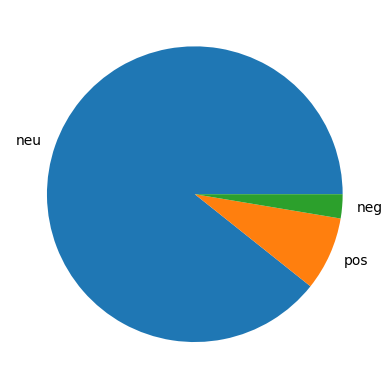

In [11]:
import matplotlib.pyplot as plt

dict_data = dict_ss.copy()
dict_data.pop('compound')
plt.pie(dict_data.values(), labels=dict_data.keys())
plt.show()

## $\S$ 4. Hashtag sentiment analysis

Many of the video titles contain hashtags, so let's evaluate their sentiments. First we extract the hashtags from the video titles.

In [4]:
import re

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

titles = audio_tiktoks["video_title"]
hashtags = hashtag_extract(titles)
hashtags[:10]

[[],
 [],
 [],
 [],
 ['dance', 'flipbook'],
 ['cute', 'dog'],
 ['fyp', 'foryou', 'tysm', 'A'],
 [],
 ['foryou', 'fyp', 'baby', 'brother'],
 ['trending', 'fyp', 'manga', 'anime', 'killua', 'animetiktok']]

In [5]:
# remove the empty lists
hashtags = sum(hashtags, [])
hashtags[:10]

['dance',
 'flipbook',
 'cute',
 'dog',
 'fyp',
 'foryou',
 'tysm',
 'A',
 'foryou',
 'fyp']

Using the list of hashtags, let's create a dataframe using the top 10 most used hashtags. (We know the plotting function takes in dataframes.)

In [6]:
series = pd.Series(hashtags)
freq = series.value_counts()
df = pd.DataFrame(freq[:10]).reset_index()
df = df.rename(columns={"index": "hashtag", 0: "frequency"})

In [8]:
ss_h = [SentimentIntensityAnalyzer().polarity_scores(h) for h in df["hashtag"]]
compound_h = [ss_h[i]['compound'] for i in range(len(ss_h))]
df['score'] = compound_h
df

,hashtag,frequency,score
0,fyp,86,0.0000
1,foryou,62,0.0000
2,dog,34,0.0000
3,foryoupage,28,0.0000
4,cute,27,0.4588
5,viral,27,0.0000
6,dance,24,0.0000
7,fypシ,18,0.0000
8,flipbook,13,0.0000
9,2022,11,0.0000


Interestingly, 9 of the 10 top hashtags have a neutral score. We also observed a majority neutral sentiment of trending TikToks in our pie chart.

## $\S$ 5. Sentiment Analysis on Trending TikToks

Now, we will combine the text from video title and audio to perform our final sentiment analysis. We define the `clean_tiktok_df()` function to prepare our dataframe and `sent_scores()` function to produce the sentiment scores.

In [9]:
import numpy as np
import re
import wordsegment
from wordsegment import load, segment
load()

def clean_tiktok_df(tiktoks):
    """
    Takes in a dataframe and removes duplicates and TikToks that do not contain viable text for analysis,
    Returns a dataframe with a new column containing text prepared for analysis
    """
    #remove duplicates
    tiktoks = tiktoks.drop_duplicates(subset='id')
    
    #remove rows with no video_title and no sound_transcribed
    tiktoks = tiktoks[(tiktoks["sound_transcribed"] != 'NA') | (tiktoks["video_title"] != '')]
    
    #replace 'NA' in sound_transcribed with ''
    tiktoks["sound_transcribed"] = [sound if sound != 'NA' else '' for sound in tiktoks["sound_transcribed"]]
    tiktoks = tiktoks.reset_index(drop = True)
    
    #replace hashtag phrase with predicted phrase with spaces added
    #create col for list of hashtag phrases
    tiktoks['hashtags'] = [re.findall(r"#(\w+)",x) for x in tiktoks['video_title']] 
    #create col for list of predicted phrases of each hashtag
    tiktoks['predicted_hashtag_words'] = [segment(' '.join(x)) for x in tiktoks['hashtags']] 
    #list -> string
    tiktoks['predicted_hashtag_words'] = [' '.join(x) for x in tiktoks['predicted_hashtag_words']]
    #remove hashtagged phrases from title
    tiktoks['video_title'] = [re.sub("#[A-Za-z0-9_]+","", x) for x in tiktoks['video_title']] 
    #new title where hashtag phrases are replaced with their predicted words
    tiktoks['video_title'] = tiktoks['video_title'] + tiktoks['predicted_hashtag_words'] 
    
    #combine title and sound_transcribed
    tiktoks['title_and_sound'] = tiktoks['video_title'] + ' ' + tiktoks['sound_transcribed']
    return tiktoks

In [11]:
import collections
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sent_scores(tiktoks):
    """
    Takes in a dataframe, calculates the sentiment scores, 
    Returns a dictionary containing the average sentiment score
    """
    ss = [SentimentIntensityAnalyzer().polarity_scores(text) for text in tiktoks['title_and_sound']]
    add_dict = collections.Counter({'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0})
    
    # add up all the sentiment scores of all the tiktoks
    for s in ss:
        counter = collections.Counter(s)
        add_dict += counter
    dict_ss = dict(add_dict)
    
    # take the average score
    for k in dict_ss.keys():
        dict_ss[k] = dict_ss[k]/len(ss)

    return dict_ss

Now that we have defined the necessary functions above, we can create our pie chart function to display the sentiment analysis.

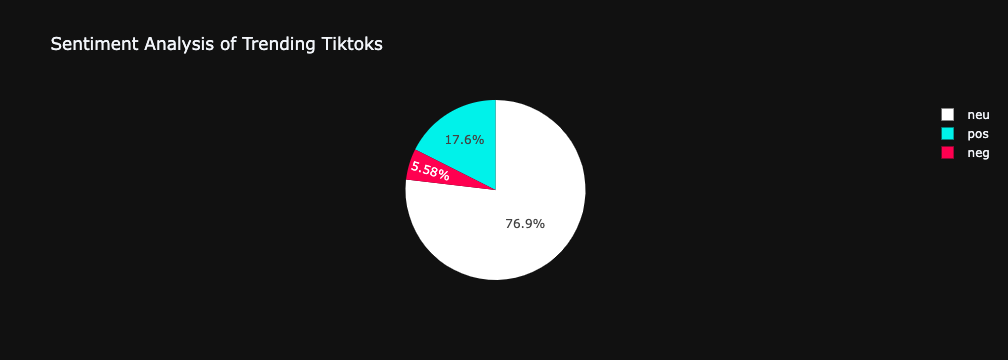

In [48]:
import plotly.express as px

def make_piechart(tiktoks):
    """
    Takes in a dataframe and returns a pie chart of the sentiment analysis
    """
    clean_tiktoks = clean_tiktok_df(tiktoks)
    dict_data = sent_scores(clean_tiktoks).copy()
    dict_data.pop('compound')
    df_data = pd.DataFrame([{'sentiment': x, 'score': y} for x,y in dict_data.items()])
    fig = px.pie(df_data, names='sentiment', values='score', 
                 title='Sentiment Analysis of Trending Tiktoks', template = 'plotly_dark', 
                 color_discrete_sequence = ['rgb(255,255,255)', 'rgb(0,242,234)', 'rgb(255,0,80)'])
    return fig
    
fig = make_piechart(tiktoks)
fig.show()

We see that the majority of the trending TikToks have neutral sentiment and there are over three times as many TikToks with positive sentiment than those of negative sentiment.